In [1]:
import numpy as np
from numpy.linalg import eig

import random

from scipy.sparse.csgraph import laplacian
from scipy.stats import bernoulli

import matplotlib.pyplot as plt

from simulate import *

In [2]:
n =1000
r = 2
p = 0.17
q = 0.11

# 1. Two Groups without Outliers (Figure 1)

In [3]:
# Generate group labels
phi_ordered = [0] * int(n / 2) + [1] * int(n / 2)
phi = [i for i in random.sample(phi_ordered, n)]
phi = phi_ordered

In [4]:
# Generate connectivity matrix B
B = np.zeros((n, n))
for i in range(n):
    for j in range(i):
        if phi[i] == phi[j]:
            B[i, j] = p
        else:
            B[i, j] = q
B = B + B.transpose()

In [5]:
# Generate adjacency matrix A
A = np.zeros((n, n))
for i in range(n):
    for j in range(i):
        A[i, j] = bernoulli.rvs(size = 1, p = B[i, j])
A = A + A.transpose()

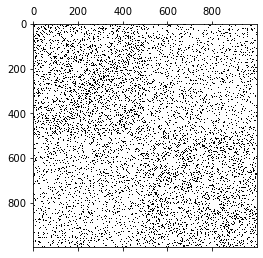

In [6]:
plt.matshow(A, cmap = plt.cm.binary)

In [7]:
# Calculate Laplacian matrix
L = laplacian(A)
values, vectors = eig(L)

val1, vec1 = find_j_eigenvec(values, vectors, j = 1)
val2, vec2 = find_j_eigenvec(values, vectors, j = 2)
vec_list = [vec1, vec2]

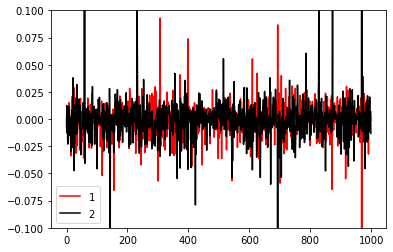

In [8]:
for i, color in enumerate(['red', 'black'], start = 1):
    plt.plot(np.arange(n).tolist(), vec_list[i - 1], color = color, label='${i}$'.format(i = i))
plt.legend(loc = 'best')
plt.ylim([- 0.1, 0.1])
plt.show()

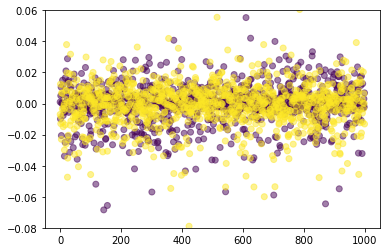

In [9]:
x = np.arange(n).tolist() * 2
y = np.concatenate((vec1, vec2), 0)
colors = [1] * n + [2] * n

plt.scatter(x, y, c = colors, alpha = 0.5)
plt.ylim([-0.08, 0.06])
plt.show()

## Figures for adjacency matrix $A$ (Fig1, right bottom)

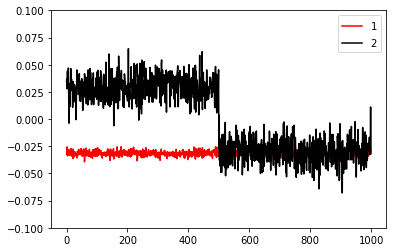

In [10]:
Avalues, Avectors = eig(A)

Aval1, Avec1 = find_j_eigenvec(Avalues, Avectors, j = 1)
Aval2, Avec2 = find_j_eigenvec(Avalues, Avectors, j = 2)
Avec_list = [Avec1, Avec2]

for i, color in enumerate(['red', 'black'], start = 1):
    plt.plot(np.arange(n).tolist(), Avec_list[i - 1], color = color, label='${i}$'.format(i = i))
plt.legend(loc = 'best')
plt.ylim([- 0.1, 0.1])
plt.show()

# 2. Two Groups with 30 Outliers (Figure 2)

In [11]:
m = 30

In [12]:
# Generate group labels, group "2" is outlier
phi_ordered_o = [0] * int(n / 2) + [1] * int(n / 2) + [2] * int(m)
#phi_o = [i for i in random.sample(phi_ordered_o, n)]
phi_o = phi_ordered_o

In [13]:
# Generate connectivity matrix B
B_in = np.zeros((n, n))
for i in range(n):
    for j in range(i):
        if phi_o[i] == phi_o[j]:
            B_in[i, j] = .17
        else:
            B_in[i, j] = .11
B_in = B_in + B_in.transpose()

In [14]:
K = conn2adj(B_in)

In [15]:
# Generate adjacdncy matrix W for outliers
B_out = np.full((m, m), .7) - .7 * np.eye(m)

W = conn2adj(B_out)

In [16]:
# Generate Z
beta = np.random.uniform(low =  0, high= 1, size = n)
beta = beta ** 2
EZ = np.tile(beta, (m, 1)).transpose()

Z = np.zeros((n, m))
for idx, z in np.ndenumerate(EZ):
    #print(idx, z)
    Z[idx] = bernoulli.rvs(size = 1, p = z)

In [17]:
# Combine K, Z and W to be A
A_combined = np.concatenate((K, Z), axis = 1)
bottom = np.concatenate((Z.transpose(), W), axis = 1)
A_combined = np.concatenate((A_combined, bottom), axis = 0)

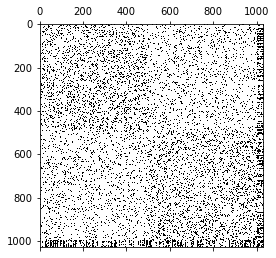

In [18]:
plt.matshow(A_combined, cmap = plt.cm.binary)

In [19]:
# Calculate Laplacian matrix
L = laplacian(A_combined)
values, vectors = eig(L)

val1, vec1 = find_j_eigenvec(values, vectors, j = 1)
val2, vec2 = find_j_eigenvec(values, vectors, j = 2)
val3, vec3 = find_j_eigenvec(values, vectors, j = 3)

In [20]:
vec_list = [vec1, vec2, vec3]

1 red
2 black
3 green


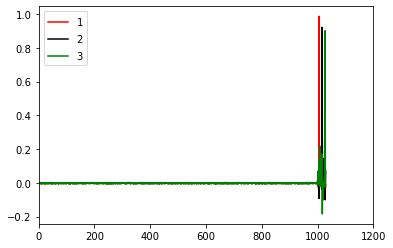

In [21]:
# cmap = plt.get_cmap('inferno')
# colors = [cmap(i) for i in list(np.arange(3))]
# enumerate(colors, start = 1):
for i, color in enumerate(['red', 'black',  'green'], start=1):
    print(i,color)
    plt.plot(np.arange(n + m).tolist(), vec_list[i - 1], color = color, label='${i}$'.format(i = i))
plt.legend(loc = 'best')
plt.xlim([0,1200])
#plt.ylim([-0.15,0.15])
plt.show()

## (Fig2, right bottom)

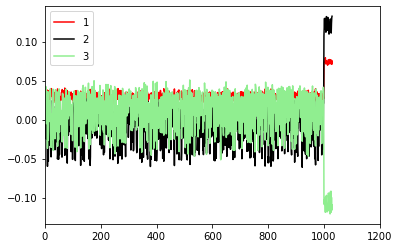

In [22]:
A_combined_values, A_combined_vectors = eig(A_combined)

A_combined_val1, A_combined_vec1 = find_j_eigenvec(A_combined_values, A_combined_vectors, j = 1)
A_combined_val2, A_combined_vec2 = find_j_eigenvec(A_combined_values, A_combined_vectors, j = 2)
A_combined_val3, A_combined_vec3 = find_j_eigenvec(A_combined_values, A_combined_vectors, j = 3)
A_combined_vec_list = [A_combined_vec1, A_combined_vec2, A_combined_vec3]

for i, color in enumerate(['red', 'black',  'lightgreen'], start = 1):
    plt.plot(np.arange(n + m).tolist(), A_combined_vec_list[i - 1], color = color, label='${i}$'.format(i = i))
    
plt.legend(loc = 'best')
plt.xlim([0,1200])
plt.show()